In [119]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [2]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [3]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [4]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad 38.78488581495631
method1 38.794885814962754
method2 38.78488581496242


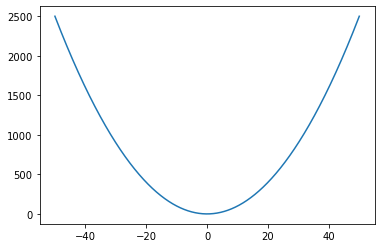

In [5]:
plt.plot(x, func1(x))
plt.show()

In [13]:
x0=np.random.uniform(-50, 50)
alpha=0.09
n_iter=100
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

-6.512358637227386 42.41081501987014
-5.340134082526457 28.51703201936068
-4.378909947671694 19.17485232981812
-3.590706157090789 12.893170706569704
-2.9443790488144472 8.66936798309747
-2.4143908200278466 5.829283031834738
-1.9798004724228342 3.9196099106056774
-1.623436387386724 2.6355457038912573
-1.3312178376571135 1.772140931296481
-1.0915986268788331 1.191587562203754
-0.8951108740406432 0.8012234768258042
-0.7339909167133274 0.5387426658176707
-0.6018725517049285 0.3622505684958018
-0.49353549239804134 0.24357728225657713
-0.4046991037663939 0.16378136458932246
-0.331853265088443 0.1101265895498604
-0.27211967737252324 0.07404911881332614
-0.22313813544546907 0.0497906274900805
-0.18297327106528463 0.033479217924330125
-0.1500380822735334 0.02251142613231958
-0.1230312274642974 0.015136682931371687
-0.10088560652072387 0.010177905603054323
-0.08272619734699357 0.006843623727493727
-0.06783548182453474 0.004601652594366783
-0.05562509509611849 0.003094151204452225
-0.045612577978

In [14]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

4.715091675025622e-10 2.2232089503895925e-19


## Линейная регрессия

In [16]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [20]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [21]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.24733176558315836, 37.95765551895755)

In [22]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [23]:
mserror_grad(X, w_true, Y)

array([[-0.03262937,  0.34661904]])

In [24]:
mserror_grad(X, w, Y)

array([[  4.90410512, -49.52527188]])

In [25]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

curent error: 4.695304517722681
curent error: 0.7737607778915178
curent error: 0.30856939016384616
curent error: 0.25306105976017734
curent error: 0.24640074406655607
curent error: 0.24559743500829986
curent error: 0.24550008150519465
curent error: 0.2454882312974525
curent error: 0.24548678309335048
curent error: 0.24548660547379308
curent error: 0.2454865836191415
curent error: 0.24548658092243603
curent error: 0.2454865805888443
curent error: 0.24548658054748654
curent error: 0.24548658054234926
curent error: 0.24548658054171
curent error: 0.2454865805416304
curent error: 0.24548658054162042
curent error: 0.24548658054161915
(1000, 2) (1, 2)


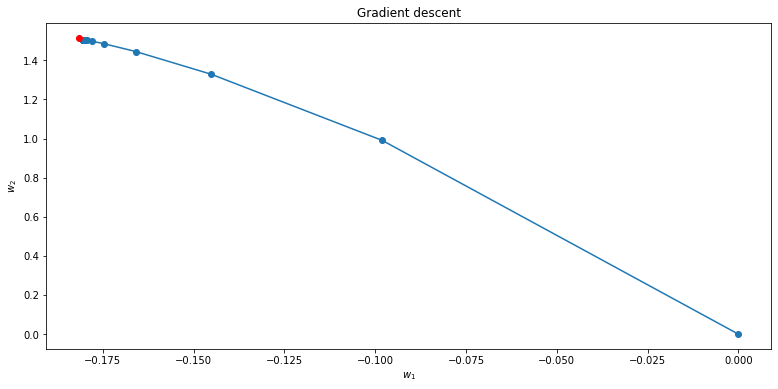

In [26]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

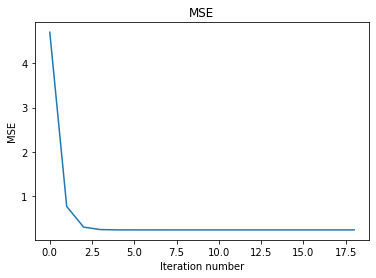

In [27]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

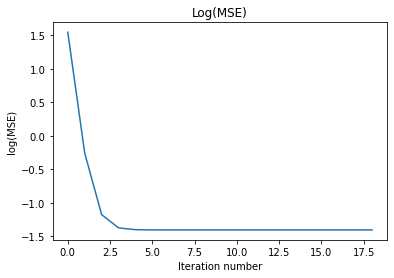

In [28]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [29]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет{0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет0.2455


In [30]:
class linear_regression:
    def __init__(self, eta = 0.02, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    @staticmethod
    def mserror(X, w, c0, y_real):
        y = X.dot(w.T)+c0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    @staticmethod
    def mserror_grad(X, w, c0, y_real):
        delta=(X.dot(w.T)+c0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def fit(self, X, Y):
        iter_num = 0
        weight_dist = np.inf
        w = np.zeros((1, X.shape[1]))
        c=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_c=self.mserror_grad(X, w, c, Y)
            new_w = w - 2 * self.eta * gr_w
            new_c = c - 2 * self.eta * gr_c
            weight_dist = np.sqrt(np.linalg.norm(new_w - w)**2+(new_c - c)**2)
            iter_num += 1
            w = new_w
            c = new_c
        self.w=w
        self.c=c
    def predict(self, X):
        return X.dot(self.w.T)+self.c
    def test(self, X, Y):
        return self.mserror(X, self.w, self.c, Y)
    

In [31]:
shift=np.random.uniform()
Y=Y+shift
lr=linear_regression()
lr.fit(X, Y)
lr.test(X, Y)

0.2454838318277021

In [32]:
shift, lr.c

(0.7957824886202423, 0.7941227430181856)

### Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

In [13]:
from math import sin, cos

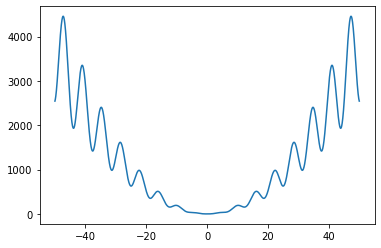

In [31]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

**Находим градиент**

In [88]:
def grad2(x):
    return x**2 * np.sin(0.5*x) * np.cos(0.5*x) + 2*x * np.sin(0.5*x)**2

**Подбор alpha**

In [455]:
x0=np.random.uniform(-50, 50)

coeff = []

for i in np.arange(0.001, 0.2, 0.001):

    alpha=i
    n_iter=150

    data_x = np.array([])
    data_y = np.array([])

    for x in range(n_iter):
        data_x = np.append(data_x, x0)
        data_y = np.append(data_y, func2(x0))

#         print(x0, func2(x0))
        x0 -= alpha * grad2(x0)
        
    if data_y[-1] < 1:
        coeff.append(i)

**Используем лучший коэффициент**

После нескольких проверок, оказалось, что 0.163 хорошо находит минимум функции.

In [478]:
for i in coeff:
    print(i, end=' ')

0.163 0.164 0.165 0.166 0.167 0.168 0.169 0.17 0.171 0.17200000000000001 0.17300000000000001 0.17400000000000002 0.17500000000000002 0.17600000000000002 0.177 0.178 0.179 0.18 0.181 0.182 0.183 0.184 0.185 0.186 0.187 0.188 0.189 0.19 0.191 0.192 0.193 0.194 0.195 0.196 0.197 0.198 0.199 

In [481]:
alpha=0.163
n_iter=100

data_x = np.array([])
data_y = np.array([])

for x in range(n_iter):
    data_x = np.append(data_x, x0)
    data_y = np.append(data_y, func2(x0))

    print(x0, func2(x0))
    x0 -= alpha * grad2(x0)

0.019419577644693594 0.00037715554965375264
0.019418383968665392 0.0003771091809693091
0.019417190512734165 0.00037706282368514294
0.019415997276832284 0.0003770164777970506
0.01941480426089215 0.0003769701433008303
0.019413611464846183 0.0003769238201922822
0.019412418888626846 0.0003768775084672086
0.019411226532166623 0.00037683120812141387
0.019410034395398026 0.0003767849191507045
0.019408842478253602 0.00037673864155088907
0.019407650780665923 0.0003766923753177779
0.019406459302567586 0.0003766461204471838
0.019405268043891224 0.0003765998769349213
0.019404077004569496 0.0003765536447768072
0.019402886184535093 0.00037650742396866036
0.01940169558372073 0.00037646121450630164
0.019400505202059153 0.00037641501638555357
0.019399315039483136 0.00037636882960224153
0.019398125095925485 0.0003763226541521923
0.01939693537131903 0.000376276490031235
0.01939574586559664 0.0003762303372352006
0.019394556578691192 0.0003761841957599223
0.019393367510535615 0.00037613806560123515
0.01939